# BENCHMARK CHOICE


In [1]:
import sys
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm


Using TensorFlow backend.


# GRAD-CAM

## 1. Xception model - gradCAM1

In [ ]:
import gradCAM_keras
from gradCAM_keras import get_img_array, make_gradcam_heatmap

In [32]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

In [33]:
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
# img_path = keras.utils.get_file(
#     "african_elephant.jpg", " https://i.imgur.com/Bvro0YD.png"
# )

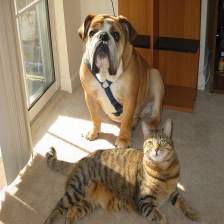

In [25]:
img_path="C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\images\\cat_dog.png"
display(Image(img_path))

In [35]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])
model.summary()

Predicted: [('n02108422', 'bull_mastiff', 0.21789527)]
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________

Total params: 22,910,480
Trainable params: 22,855,952
Non-trainable params: 54,528
__________________________________________________________________________________________________


In [36]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

NotImplementedError: tf.GradientTape.gradients() does not support graph control flow operations like tf.cond or tf.while at this time. Use tf.gradients() instead. If you need this feature, please file a feature request at https://github.com/tensorflow/tensorflow/issues/new

In [ ]:
"""
## Create a superimposed visualization
"""

# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

In [ ]:
# Save the superimposed image
save_path = "C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\images\\cat_dog_cam.jpg"
superimposed_img.save(save_path)

In [ ]:
# Display Grad CAM
display(Image(save_path))

## 2. VGG and gradCAM-2
gradcaxm modificato per incpetion e input 299. se si vuole utilizzare con vgg16 cambiare da codice interno

In [5]:
import guided_grad_cam
from guided_grad_cam import load_image, deprocess_image, normalize,build_guided_model, guided_backprop, grad_cam, grad_cam_batch, compute_saliency

In [3]:
from keras.applications.vgg16 import VGG16

In [4]:
model = VGG16(include_top=True, weights='imagenet')
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________

In [11]:
guided_model = build_guided_model()
guided_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [9]:
image_path = "C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\images\\cat_dog.png"

In [10]:
pre_processed_input = load_image(image_path, H=224, W=224)
gradcam, gb, guided_gradcam = compute_saliency(model, guided_model, image_path,pre_processed_input, layer_name='block5_conv3',
                                                    cls=-1, visualize=True, save=True)


Model prediction:
	boxer          	(242)	with probability 0.420
	bull_mastiff   	(243)	with probability 0.282
	tiger_cat      	(282)	with probability 0.053
	tiger          	(292)	with probability 0.050
	Great_Dane     	(246)	with probability 0.050
Explanation for 'boxer'


ValueError: No such layer: block5_conv3

# INCEPTION

## UTILS

In [2]:

def process_image(path, model, H, W,  preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = model.preprocess_input(x)
    return x

## 3. INCEPTION GRAD-CAM



In [6]:
from keras.applications import inception_v3
model = inception_v3.InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
_______________________________________________________________________________________

In [7]:
guided_model = build_guided_model()

In [10]:
preprocessed_input = process_image(image_path, inception_v3, H=299, W=299)
preprocessed_input.shape

(1, 299, 299, 3)


Model prediction:
	bull_mastiff   	(243)	with probability 0.450
	tiger_cat      	(282)	with probability 0.057
	boxer          	(242)	with probability 0.045
	tabby          	(281)	with probability 0.031
	doormat        	(539)	with probability 0.007
Explanation for 'bull_mastiff'


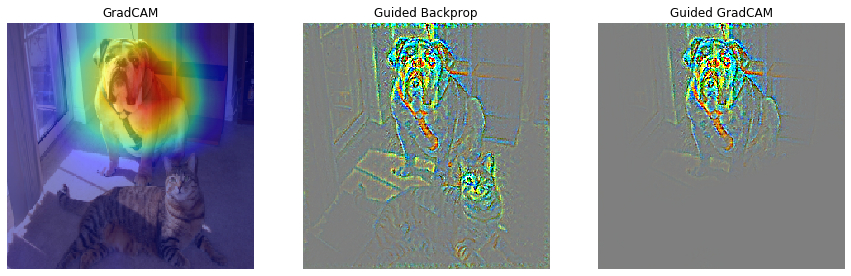

In [11]:
gradcam, gb, guided_gradcam = compute_saliency(model, guided_model, image_path, preprocessed_input, layer_name='mixed10',
                                                    cls=-1, visualize=True, save=True)

numpy.ndarray

# LIME

('n02108422', 'bull_mastiff', 0.44994307)
('n02123159', 'tiger_cat', 0.05720755)
('n02108089', 'boxer', 0.045161296)
('n02123045', 'tabby', 0.030569043)
('n03223299', 'doormat', 0.007183305)


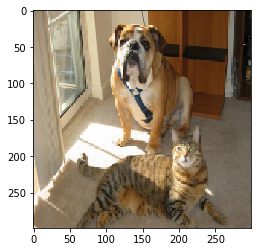

In [14]:
plt.imshow(preprocessed_input[0] / 2 + 0.5)
preds = model.predict(preprocessed_input)
for x in decode_predictions(preds)[0]:
    print(x)

In [15]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [16]:
explainer = lime_image.LimeImageExplainer()

In [18]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(preprocessed_input[0], model.predict, top_labels=10, hide_color=None, num_samples=1000)


Wall time: 3min 58s


In [19]:
from skimage.segmentation import mark_boundaries

In [20]:
#decode_predictions(explanation.top_labels)
labels=np.zeros([1, 1000])
for index, el in enumerate(explanation.top_labels):
    labels[0, el]=1000-index
decode_predictions(labels, top=10)

[[('n02108422', 'bull_mastiff', 1000.0),
  ('n02123159', 'tiger_cat', 999.0),
  ('n02108089', 'boxer', 998.0),
  ('n02123045', 'tabby', 997.0),
  ('n03223299', 'doormat', 996.0),
  ('n02129604', 'tiger', 995.0),
  ('n02108915', 'French_bulldog', 994.0),
  ('n02093428', 'American_Staffordshire_terrier', 993.0),
  ('n02124075', 'Egyptian_cat', 992.0),
  ('n02110958', 'pug', 991.0)]]

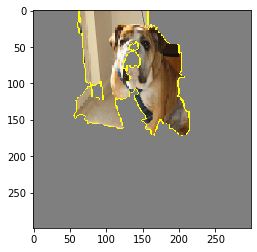

In [23]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=8, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

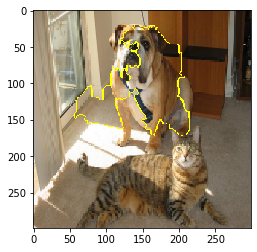

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

# SHAP

In [24]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.applications import vgg16

#from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
#from keras.applications import inception_v3
import requests
from skimage.segmentation import slic
import matplotlib.pylab as plt
import pandas as pd
import shap
import warnings

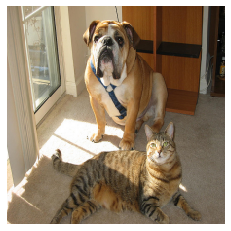

In [25]:
# load model data
r = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')
feature_names = r.json()
model = VGG16()
#model=InceptionV3()
# load an image
file = "./cat_dog.png"
img = image.load_img(file, target_size=(224, 224))
#img=image.load_img(file, target_size=(299, 299))
img_orig = image.img_to_array(img)
plt.imshow(img);
plt.axis('off');

In [26]:
y=model.predict(preprocess_input(np.expand_dims(img_orig, axis=0)))
print(decode_predictions(y))

[[('n02108089', 'boxer', 0.42014182), ('n02108422', 'bull_mastiff', 0.28162262), ('n02123159', 'tiger_cat', 0.053450093), ('n02129604', 'tiger', 0.05013468), ('n02109047', 'Great_Dane', 0.049807902)]]


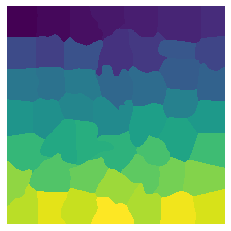

In [17]:
segments_slic = slic(img, n_segments=50, compactness=30, sigma=3)
plt.imshow(segments_slic);
plt.axis('off');

In [18]:
def mask_image(zs, segmentation, image, background=None):
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out
def f(z):
    
    return model.predict(preprocess_input(mask_image(z, segments_slic, img_orig, 255)))

In [8]:
# use Kernel SHAP to explain the network's predictions
explainer = shap.KernelExplainer(f, np.zeros((1,50)))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    shap_values = explainer.shap_values(np.ones((1,50)), nsamples=1000)

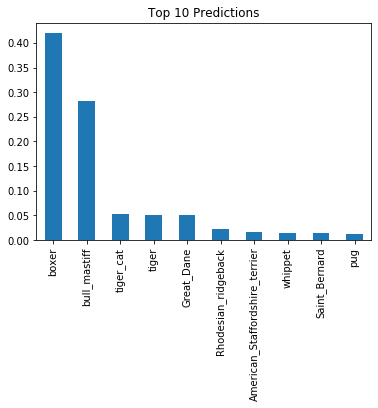

In [28]:
# get the top predictions from the model
top_preds = np.argsort(-y)
inds = top_preds[0]
top_10_pred=pd.Series(data={feature_names[str(inds[i])][1]:y[0, inds[i]] for i in range(10)})
top_10_pred.plot(kind='bar', title='Top 10 Predictions')

In [29]:
# make a color map
from matplotlib.colors import LinearSegmentedColormap
colors = []
for l in np.linspace(1,0,100):
    colors.append((245/255,39/255,87/255,l))
for l in np.linspace(0,1,100):
    colors.append((24/255,196/255,93/255,l))
    
cm = LinearSegmentedColormap.from_list("shap", colors)
# Visualize the explanations
def fill_segmentation(values, segmentation):
    out = np.zeros(segmentation.shape)
    for i in range(len(values)):
        out[segmentation == i] = values[i]
    return out

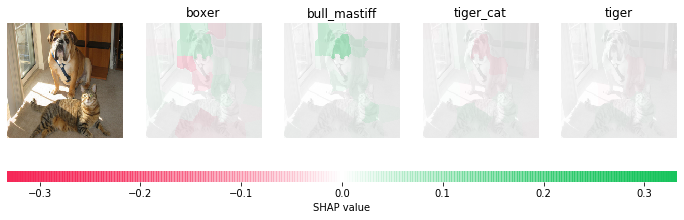

In [30]:
# plot our explanations
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
inds = top_preds[0]
axes[0].imshow(img)
axes[0].axis('off')
max_val = np.max([np.max(np.abs(shap_values[i][:,:-1])) for i in range(len(shap_values))])
for i in range(4):
    m = fill_segmentation(shap_values[inds[i]][0], segments_slic)
    axes[i+1].set_title(feature_names[str(inds[i])][1])
    axes[i+1].imshow(img.convert('LA'), alpha=0.15)
    im = axes[i+1].imshow(m, cmap=cm, vmin=-max_val, vmax=max_val)
    axes[i+1].axis('off')
cb = fig.colorbar(im, ax=axes.ravel().tolist(), label="SHAP value", orientation="horizontal", aspect=60)
cb.outline.set_visible(False)
plt.show()

I'm interested in m!! it's the shape value of the image for each prediction, but with the same shape of the original image

In [33]:
X,y = shap.datasets.imagenet50()

In [34]:
# select a set of background examples to take an expectation over
background = X[np.random.choice(X.shape[0], 20, replace=False)]

In [35]:
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)

ValueError: Layer vgg16 was called with an input that isn't a symbolic tensor. Received type: <class 'numpy.ndarray'>. Full input: [array([[[[164., 144., 143.],
         [165., 145., 144.],
         [165., 145., 144.],
         ...,
         [154., 135., 131.],
         [155., 136., 132.],
         [154., 135., 131.]],

        [[165., 145., 144.],
         [165., 145., 144.],
         [165., 145., 144.],
         ...,
         [155., 136., 132.],
         [153., 134., 130.],
         [154., 135., 131.]],

        [[165., 145., 144.],
         [165., 145., 144.],
         [165., 145., 144.],
         ...,
         [155., 136., 132.],
         [155., 136., 132.],
         [154., 135., 131.]],

        ...,

        [[244., 239., 235.],
         [245., 240., 236.],
         [244., 239., 235.],
         ...,
         [242., 237., 234.],
         [242., 237., 233.],
         [242., 237., 233.]],

        [[244., 239., 235.],
         [244., 239., 235.],
         [244., 239., 235.],
         ...,
         [242., 237., 233.],
         [242., 237., 233.],
         [241., 236., 232.]],

        [[243., 238., 234.],
         [243., 238., 234.],
         [243., 238., 234.],
         ...,
         [242., 237., 233.],
         [242., 237., 233.],
         [241., 236., 232.]]],


       [[[154., 154., 154.],
         [154., 154., 154.],
         [155., 155., 155.],
         ...,
         [156., 156., 156.],
         [156., 156., 156.],
         [156., 156., 156.]],

        [[154., 154., 154.],
         [154., 154., 154.],
         [155., 155., 155.],
         ...,
         [155., 155., 155.],
         [155., 155., 155.],
         [155., 155., 155.]],

        [[155., 155., 155.],
         [155., 155., 155.],
         [155., 155., 155.],
         ...,
         [155., 155., 155.],
         [155., 155., 155.],
         [155., 155., 155.]],

        ...,

        [[154., 154., 154.],
         [154., 154., 154.],
         [154., 154., 154.],
         ...,
         [152., 152., 152.],
         [152., 152., 152.],
         [153., 153., 153.]],

        [[153., 153., 153.],
         [154., 154., 154.],
         [154., 154., 154.],
         ...,
         [152., 152., 152.],
         [153., 153., 153.],
         [153., 153., 153.]],

        [[153., 153., 153.],
         [153., 153., 153.],
         [154., 154., 154.],
         ...,
         [152., 152., 152.],
         [153., 153., 153.],
         [153., 153., 153.]]],


       [[[148., 141., 115.],
         [136., 131., 101.],
         [117., 112.,  80.],
         ...,
         [ 51.,  58.,  68.],
         [ 61.,  60.,  68.],
         [ 72.,  70.,  73.]],

        [[148., 142., 118.],
         [138., 133., 104.],
         [115., 110.,  80.],
         ...,
         [ 52.,  56.,  67.],
         [ 69.,  69.,  77.],
         [ 79.,  77.,  78.]],

        [[156., 150., 128.],
         [133., 128.,  98.],
         [119., 113.,  79.],
         ...,
         [ 58.,  62.,  73.],
         [ 77.,  78.,  83.],
         [ 83.,  79.,  80.]],

        ...,

        [[ 94.,  92.,  93.],
         [ 71.,  83.,  61.],
         [ 76.,  94., 114.],
         ...,
         [ 65.,  55.,  56.],
         [104.,  94.,  69.],
         [141., 138., 121.]],

        [[118., 116., 103.],
         [ 75.,  83.,  68.],
         [ 60.,  61.,  53.],
         ...,
         [ 65.,  57.,  54.],
         [ 38.,  37.,  32.],
         [ 37.,  43.,  39.]],

        [[ 75.,  80.,  60.],
         [ 50.,  61.,  47.],
         [ 50.,  52.,  39.],
         ...,
         [ 22.,  31.,  30.],
         [ 30.,  43.,  62.],
         [ 58.,  77., 109.]]],


       ...,


       [[[235., 239., 240.],
         [238., 239., 241.],
         [239., 240., 242.],
         ...,
         [254., 255., 250.],
         [254., 254., 246.],
         [255., 255., 247.]],

        [[116., 133., 153.],
         [120., 136., 159.],
         [133., 148., 171.],
         ...,
         [254., 255., 250.],
         [255., 255., 251.],
         [251., 252., 247.]],

        [[133., 141., 162.],
         [127., 135., 156.],
         [132., 138., 162.],
         ...,
         [254., 254., 252.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[188., 188., 160.],
         [210., 216., 180.],
         [171., 189., 141.],
         ...,
         [ 41.,  42.,  37.],
         [ 40.,  46.,  36.],
         [ 31.,  41.,  32.]],

        [[240., 246., 208.],
         [ 96., 112.,  65.],
         [149., 160., 117.],
         ...,
         [ 41.,  44.,  37.],
         [ 49.,  53.,  39.],
         [ 28.,  38.,  29.]],

        [[ 78.,  93.,  38.],
         [113., 131.,  79.],
         [248., 252., 215.],
         ...,
         [ 46.,  58.,  48.],
         [ 51.,  62.,  46.],
         [ 32.,  48.,  37.]]],


       [[[ 30.,  45.,  24.],
         [ 30.,  45.,  26.],
         [ 30.,  42.,  30.],
         ...,
         [112., 173., 158.],
         [116., 177., 162.],
         [115., 176., 160.]],

        [[ 37.,  51.,  25.],
         [ 23.,  36.,  18.],
         [ 21.,  31.,  22.],
         ...,
         [113., 175., 162.],
         [107., 171., 157.],
         [107., 171., 154.]],

        [[ 34.,  50.,  24.],
         [ 22.,  35.,  17.],
         [ 20.,  30.,  21.],
         ...,
         [110., 168., 153.],
         [116., 170., 157.],
         [122., 176., 162.]],

        ...,

        [[161., 181.,  94.],
         [153., 169.,  96.],
         [161., 175.,  87.],
         ...,
         [158., 174., 101.],
         [122., 142.,  55.],
         [ 87.,  99.,  15.]],

        [[158., 169.,  91.],
         [176., 182., 122.],
         [165., 170.,  90.],
         ...,
         [185., 191., 143.],
         [121., 125.,  38.],
         [143., 147.,  53.]],

        [[154., 157.,  86.],
         [162., 161., 113.],
         [185., 189., 113.],
         ...,
         [190., 201., 145.],
         [169., 176.,  96.],
         [ 79.,  84.,   0.]]],


       [[[214., 194., 183.],
         [216., 196., 185.],
         [217., 197., 186.],
         ...,
         [131.,  80.,  25.],
         [129.,  90.,  49.],
         [ 40.,  27.,  11.]],

        [[212., 192., 181.],
         [215., 195., 184.],
         [217., 197., 186.],
         ...,
         [134.,  83.,  28.],
         [129.,  90.,  49.],
         [ 39.,  26.,  10.]],

        [[210., 190., 179.],
         [215., 195., 184.],
         [220., 200., 189.],
         ...,
         [134.,  85.,  29.],
         [131.,  92.,  51.],
         [ 39.,  26.,  10.]],

        ...,

        [[103.,  87.,  64.],
         [ 94.,  76.,  52.],
         [ 97.,  79.,  55.],
         ...,
         [ 69.,  57.,  43.],
         [ 72.,  60.,  46.],
         [ 54.,  42.,  30.]],

        [[ 92.,  74.,  50.],
         [112.,  96.,  71.],
         [111.,  93.,  69.],
         ...,
         [ 58.,  50.,  39.],
         [ 54.,  46.,  33.],
         [ 80.,  72.,  59.]],

        [[109.,  92.,  66.],
         [ 98.,  84.,  58.],
         [101.,  85.,  60.],
         ...,
         [ 68.,  61.,  51.],
         [ 70.,  64.,  52.],
         [ 56.,  50.,  38.]]]], dtype=float32)]. All inputs to the layer should be tensors.

In [ ]:
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])